In [12]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
#from dotenv import load_dotenv
from tueplots import bundles
from tueplots.constants.color import rgb

In [13]:
#load_dotenv()

In [14]:
#os.getenv("DATASET_PATH")

In [15]:
final_df = pd.read_csv('../dat/all-data-best-city.csv', index_col=0)

In [16]:
#final_df = pd.read_csv(os.getenv("DATASET_PATH"), index_col=0)

In [17]:
final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852


In [18]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng'],
      dtype='object')

In [19]:
#final_df = final_df.drop(['rank_cost_living', 'rank_traffic','rank_safety'], axis=1)
#final_df.head()

In [20]:
feature_name_dict = {'cost_live_rent_index':'Cost of Living', 'purchase_pow_index':'Purchasing Power',
       'safety_index':'Safety', 'pollution_index':'Pollution',
       'trffic_min_index':'Traffic', 'mean_tmp':'Mean Temperature', 'std_dev_temp':'Mean temperature Std Dev'}

/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kayoonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

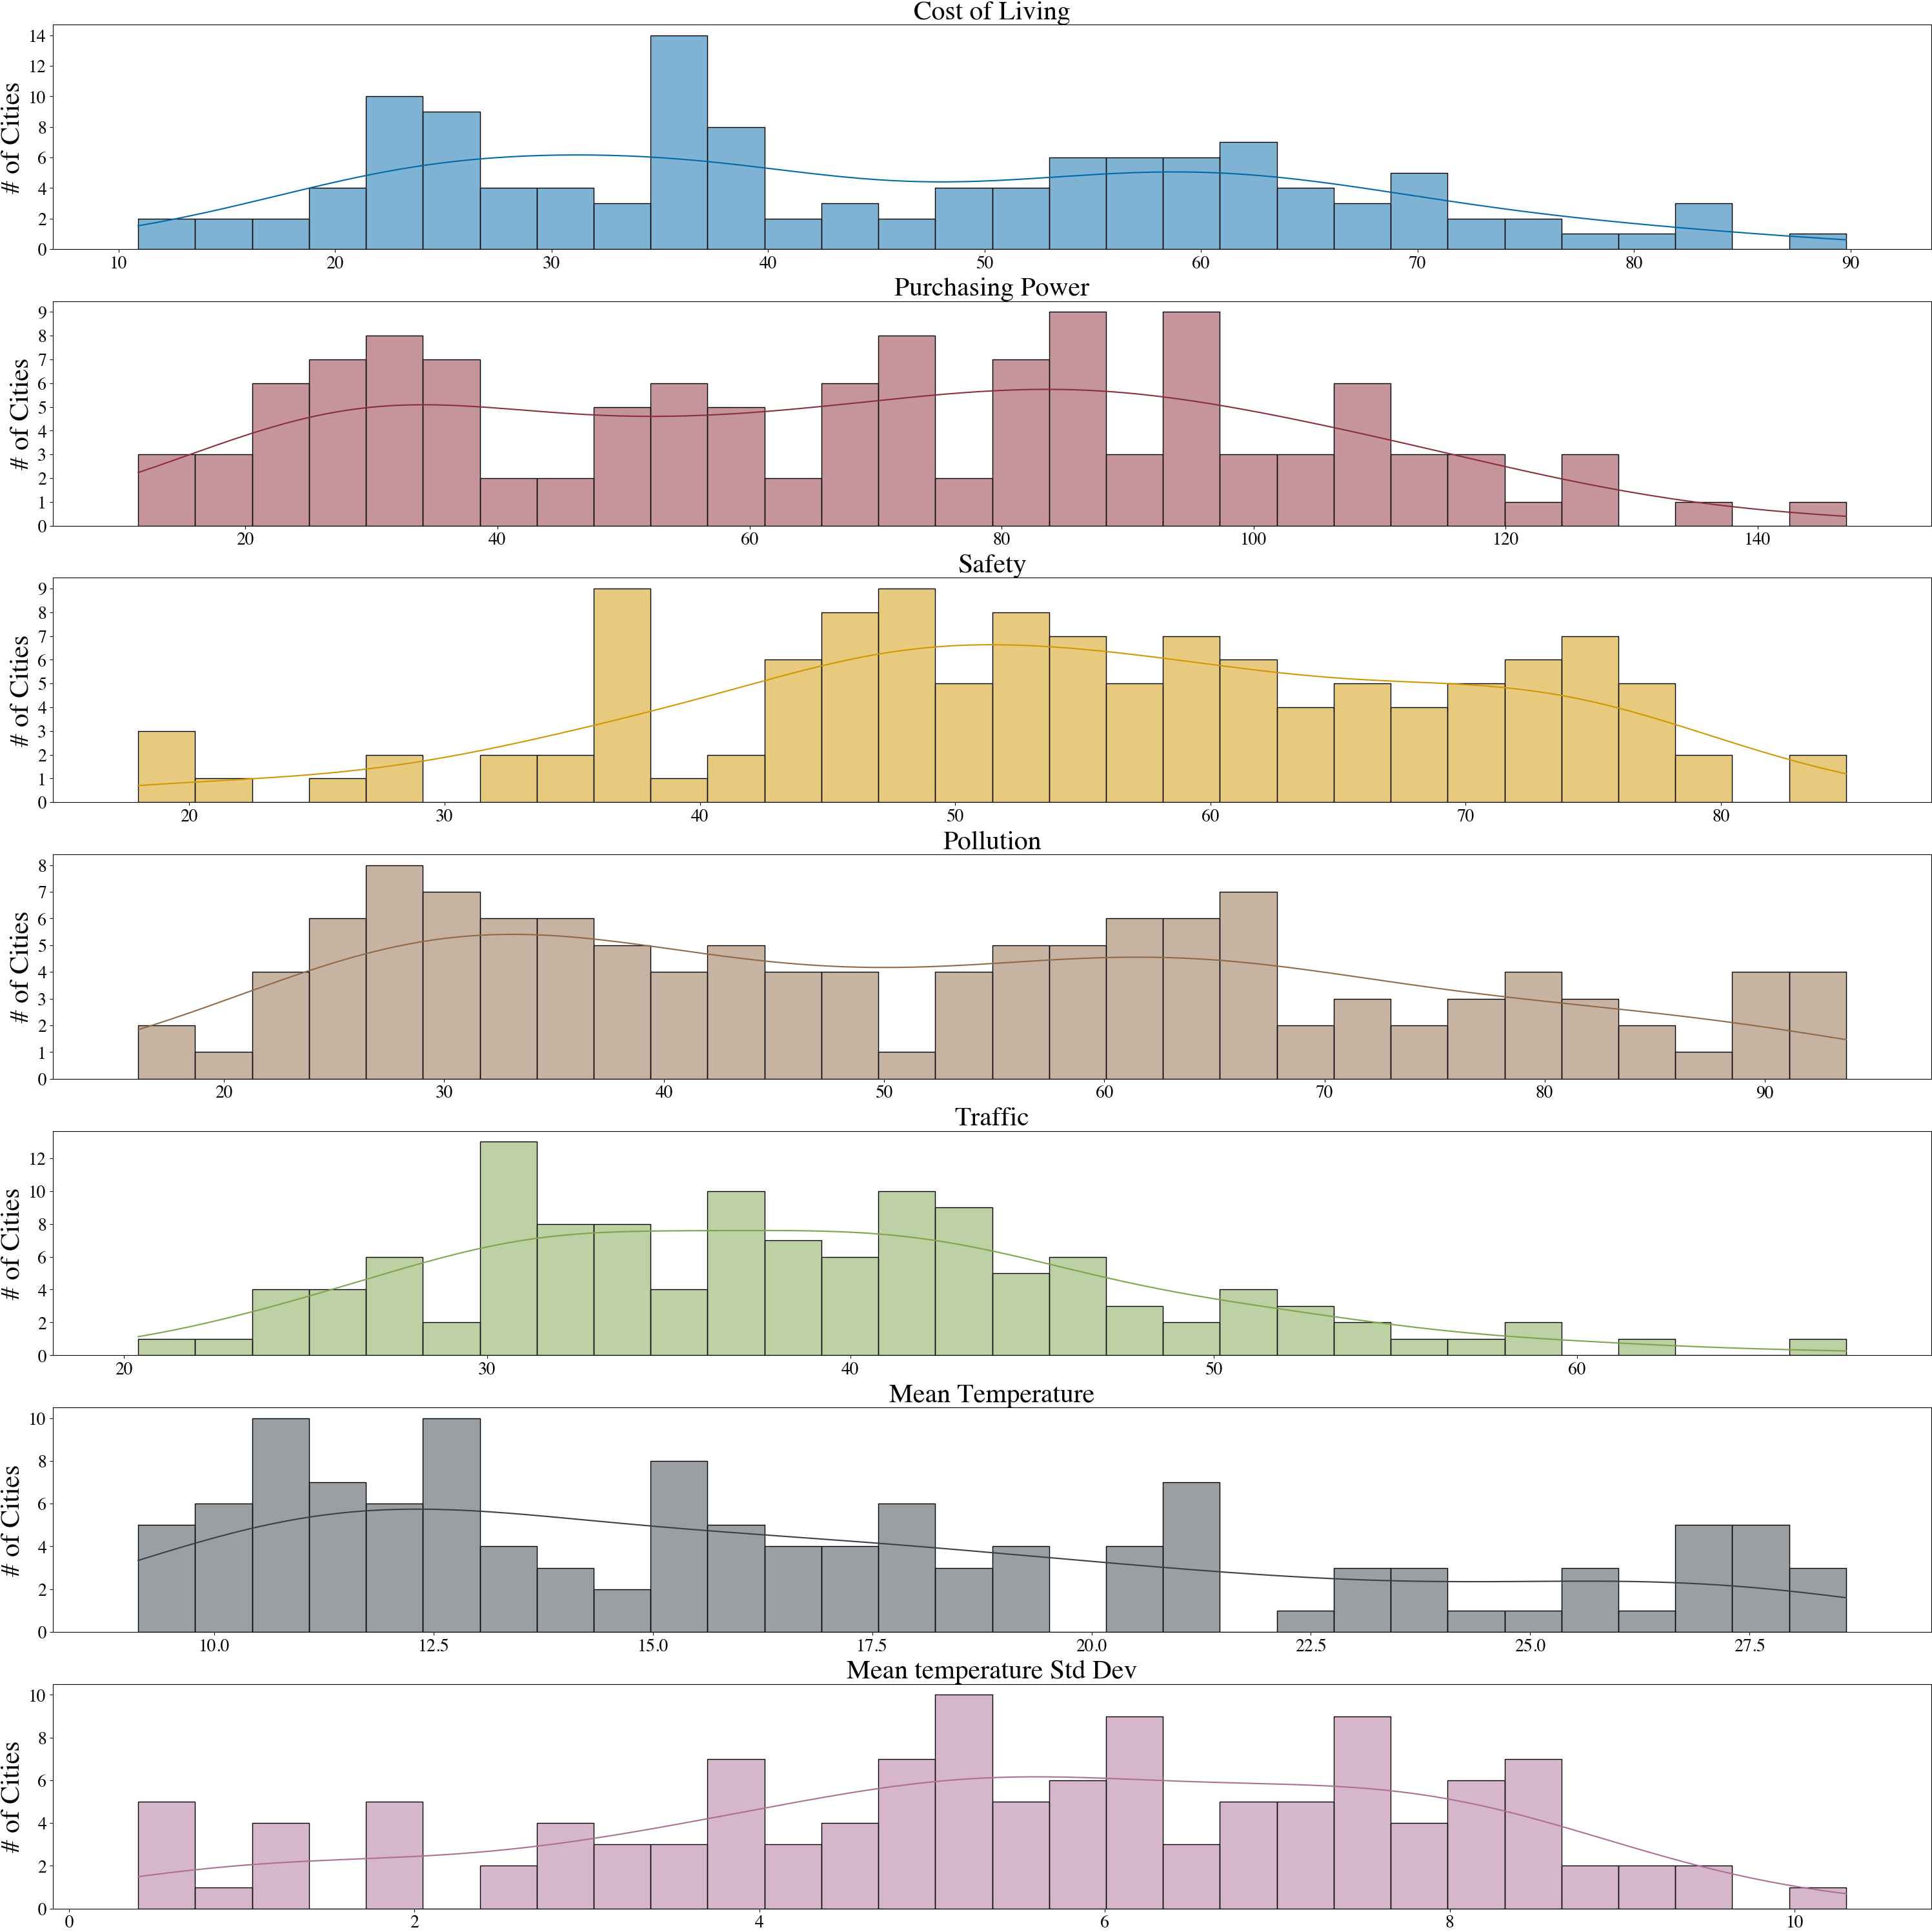

In [21]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams.update(bundles.icml2022(column="half", nrows=30, ncols=30, usetex=False))
fig, axis = plt.subplots(7, 1, figsize=(30, 30))
axis = axis.flatten()

# Create the list with the x labels' name for the plot
feature_names = list(feature_name_dict.keys())
colors = [rgb.tue_blue, rgb.tue_red, rgb.tue_orange, rgb.tue_brown, rgb.tue_green, rgb.tue_dark, rgb.tue_violet]


for i in range(len(feature_names)):
    sns.histplot(final_df[feature_names[i]], ax=axis[i], color=colors[i], kde=True, bins=30)
    axis[i].set_title(feature_name_dict[feature_names[i]], fontsize='30')  # Increase fontsize here
    axis[i].set_ylabel("# of Cities", fontsize='30')  # Increase fontsize here
    axis[i].tick_params(axis='both', which='major', labelsize='20')  # Increase fontsize of the axis points
    axis[i].set_xlabel('')  # Remove x-labels
    axis[i].yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure y-axis has only integer values

plt.savefig("feature-histograms.pdf")
plt.show()



In [22]:
final_df['rank_cost_live_rent'] = final_df['cost_live_rent_index'].rank(ascending=False) #the lowest index has the higher score 
final_df['rank_purchase_pow'] = final_df['purchase_pow_index'].rank(ascending=True) #the lowest index has the lowest score
final_df['rank_safety'] = final_df['safety_index'].rank(ascending=True) #the lowest index has the lowest score 
final_df['rank_pollution'] = final_df['pollution_index'].rank(ascending=False) #the lowest index has the higher score
final_df['rank_traffic'] = final_df['trffic_min_index'].rank(ascending=False)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng,rank_cost_live_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460,5.0,69.0,56.0,84.0,44.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244,2.0,110.0,31.5,87.5,22.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269,14.0,62.0,105.0,113.0,34.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000,22.0,59.0,92.0,110.0,28.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852,4.0,108.0,77.0,96.0,23.0


In [23]:
# Define variables for best mean temperature and best std deviation value
best_mean_tmp = 20
best_std_dev_tmp = 13

# Testing for temperature 
final_df['mean_tmp_diff_from_best'] = abs(best_mean_tmp - final_df['mean_tmp'])
final_df['tmp_std_dev_diff_from_best'] = abs(best_std_dev_tmp - final_df['std_dev_temp'])

#two ranking, one for average temperature, one for stand. dev.
final_df['rank_mean_tmp'] = final_df['mean_tmp_diff_from_best'].rank(ascending=False)
final_df['rank_std_dev_tmp'] = final_df['tmp_std_dev_diff_from_best'].rank(ascending=False)

final_df.head()

,city_ascii,cost_live_rent_index,purchase_pow_index,country,mean_tmp,std_dev_temp,safety_index,pollution_index,trffic_min_index,lat,lng,rank_cost_live_rent,rank_purchase_pow,rank_safety,rank_pollution,rank_traffic,mean_tmp_diff_from_best,tmp_std_dev_diff_from_best,rank_mean_tmp,rank_std_dev_tmp
0,Honolulu,80.4,74.4,United States,25.441667,1.837220,52.6,37.0,41.5,21.3294,-157.8460,5.0,69.0,56.0,84.0,44.0,5.441667,11.162780,69.0,13.0
1,Seattle,83.4,108.4,United States,11.316667,5.142662,45.7,34.7,46.9,47.6211,-122.3244,2.0,110.0,31.5,87.5,22.0,8.683333,7.857338,24.0,51.0
2,Canberra,69.1,69.1,Australia,13.141667,5.418396,72.0,26.1,43.3,-35.2931,149.1269,14.0,62.0,105.0,113.0,34.0,6.858333,7.581604,55.0,61.0
3,Adelaide,64.6,67.3,Australia,17.208333,4.416798,66.7,27.1,45.1,-34.9275,138.6000,22.0,59.0,92.0,110.0,28.0,2.791667,8.583202,97.0,38.0
4,Boston,82.0,106.6,United States,12.063636,8.341855,59.6,32.3,46.5,42.3188,-71.0852,4.0,108.0,77.0,96.0,23.0,7.936364,4.658145,35.0,111.0


In [24]:
final_df.columns

Index(['city_ascii', 'cost_live_rent_index', 'purchase_pow_index', 'country',
       'mean_tmp', 'std_dev_temp', 'safety_index', 'pollution_index',
       'trffic_min_index', 'lat', 'lng', 'rank_cost_live_rent',
       'rank_purchase_pow', 'rank_safety', 'rank_pollution', 'rank_traffic',
       'mean_tmp_diff_from_best', 'tmp_std_dev_diff_from_best',
       'rank_mean_tmp', 'rank_std_dev_tmp'],
      dtype='object')

In [25]:
wht_dict = {"wt_mean_tmp":0.5,"wt_std_dev":0.5,"wt_safety":0.8,"wt_pollution":0.4,"wt_cost_living":0.7,"wt_traffic":0.4,"wt_purchase_pow":0.6}

scores = []
for index, row in final_df.iterrows():
    s = (( row['rank_cost_live_rent']*wht_dict['wt_cost_living'] + \
        row['rank_mean_tmp']*wht_dict['wt_mean_tmp'] + \
            row['rank_std_dev_tmp']*wht_dict['wt_std_dev'] + \
                row['rank_safety']*wht_dict['wt_safety'] +\
                    row['rank_pollution']*wht_dict['wt_pollution'] +\
                        row['rank_traffic']*wht_dict['wt_traffic'] +\
                            row['rank_purchase_pow']*wht_dict['wt_purchase_pow']) / sum(wht_dict.values()))
    scores.append(s)

finding_home_df = final_df[['city_ascii','country','lat','lng']].copy()

finding_home_df['final_score'] = scores

finding_home_df = finding_home_df.sort_values(by=['final_score'], ascending=False)

finding_home_df.head()

,city_ascii,country,lat,lng,final_score
86,Valencia,Spain,39.4700,-0.3764,92.051282
80,Madrid,Spain,40.4169,-3.7033,89.615385
64,Vienna,Austria,48.2083,16.3725,86.794872
79,Riyadh,Saudi Arabia,24.6333,46.7167,84.923077
84,Muscat,Oman,23.6139,58.5922,83.615385


In [26]:
finding_home_df = finding_home_df.reset_index(drop=True)
#finding_home_df = finding_home_df.drop
finding_home_df.head()

,city_ascii,country,lat,lng,final_score
0,Valencia,Spain,39.4700,-0.3764,92.051282
1,Madrid,Spain,40.4169,-3.7033,89.615385
2,Vienna,Austria,48.2083,16.3725,86.794872
3,Riyadh,Saudi Arabia,24.6333,46.7167,84.923077
4,Muscat,Oman,23.6139,58.5922,83.615385
